# 11. Прогнозирование вероятности оттока пользователей для фитнес-центров

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загружаем-данные" data-toc-modified-id="Загружаем-данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загружаем данные</a></span></li></ul></li><li><span><a href="#Проведите-исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Проведите-исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проведите исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Постройте-модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Постройте-модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Постройте модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Сделайте-кластеризацию-клиентов" data-toc-modified-id="Сделайте-кластеризацию-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сделайте кластеризацию клиентов</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта


Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * 1. выделить целевые группы клиентов;
    * 2. предложить меры по снижению оттока;
    * 3. определить другие особенности взаимодействия с клиентами.

# Описание данных

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.<br>
Набор данных включает следующие поля:

* `'Churn'` — факт оттока в текущем месяце;
* Текущие поля в датасете:
    * Данные клиента за предыдущий до проверки факта оттока месяц:
        * `'gender'` — пол;
        * `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
        * `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        * `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        * `'Phone'` — наличие контактного телефона;
        * `'Age'` — возраст;
        * `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).<br><br>
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * `'Contract_period'` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
    * `'Group_visits'` — факт посещения групповых занятий;
    * `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
    * `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
    * `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt

from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_columns', 50) #устанавливаем максимальное число отображаемых колонок
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 1)

def load_csv_choose_path(file):
    if os.path.exists(file):
        db = pd.read_csv(file, sep = ',')
    elif os.path.exists('/datasets/'+file):
        db = pd.read_csv('/datasets/'+file, sep = ',')
    else:
        raise FileNotFoundError(file)
    return db

In [2]:
print (pd.__version__) #проверка версии

0.25.1


### Загружаем данные

In [3]:
gym = load_csv_choose_path('gym_churn.csv')
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


## Проведите исследовательский анализ данных (EDA)

In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


4000 записей, 14 колонок, пропусков нет.

In [5]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Исходя из данных пол распределен примерно поровну<br>
В основном(85%) клиенты выбирают зал рядом с домом или работой, почти половина клиентов приходят по партнёрской программе.<br>
Возраст клиентов 18-41 (средний около 29 лет, медианный такой же).<br>
Средний абонемент 4,5 месяцев, чуть больше 40% клиентов посещают групповые занятия. В среднем зал посещают 2 раза в неделю.<br>
Время с момента первого обращения в фитнес-центр составляет чуть меньше 4 месяцев.

In [6]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Исходя из средних значений, остаются клиенты пришедшие по партнерской программе и у которых фитнес-центр находится рядом с домом или работой.

Чаще уходят клиенты реже посещающие групповые занятия, с коротким абонементом. Время с момента первого обращения в фитнес-центр составляет меньше месяца.

Исходя из средних значений, видим что ушедшие выбирают более короткий абонемен, чем оставшиеся.<br>
Ушедшие реже  ходят в зал и посещают групповые занятия, меньше тратят на доп. услуги.

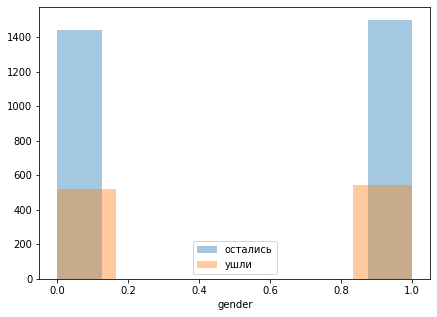

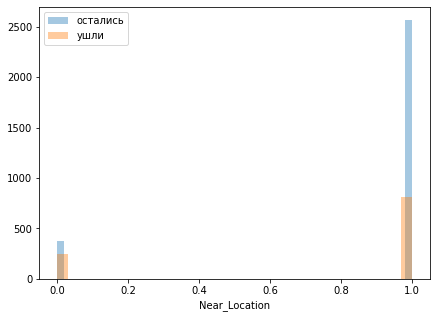

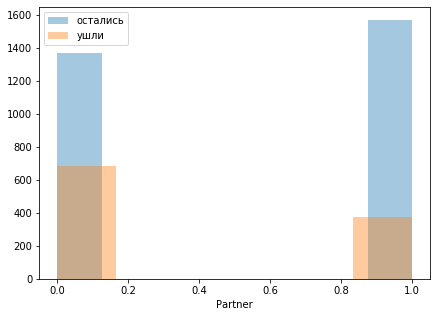

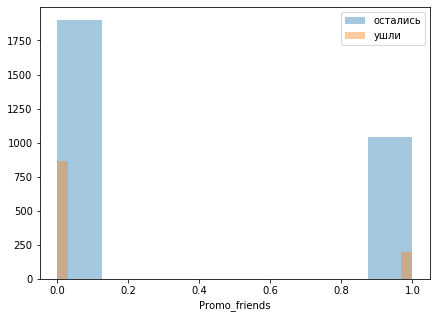

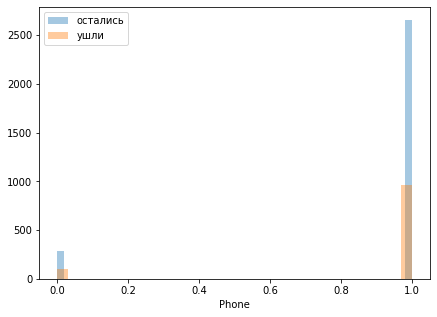

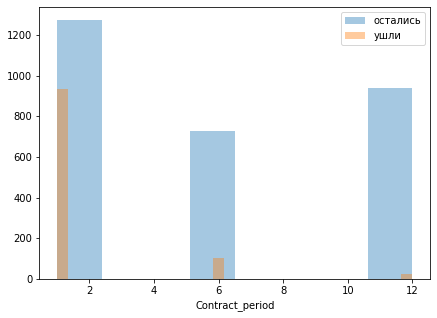

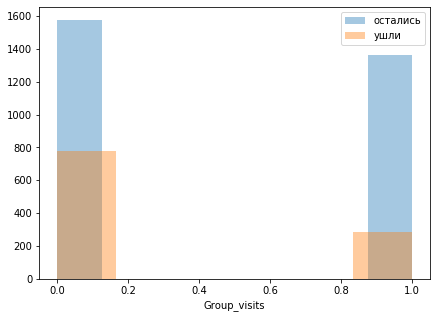

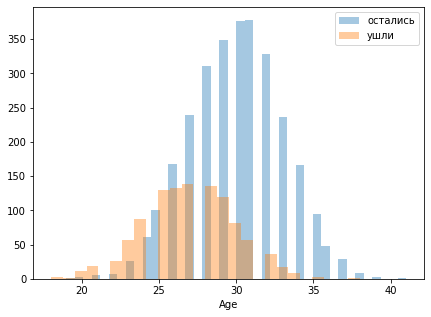

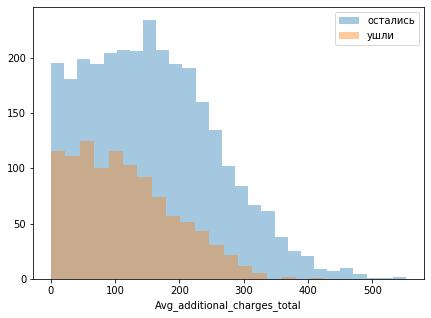

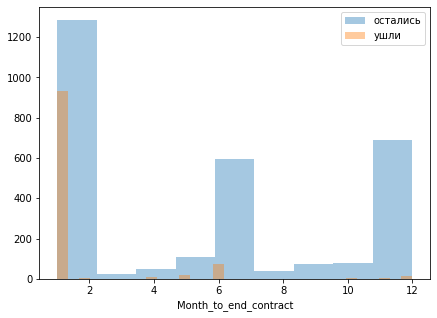

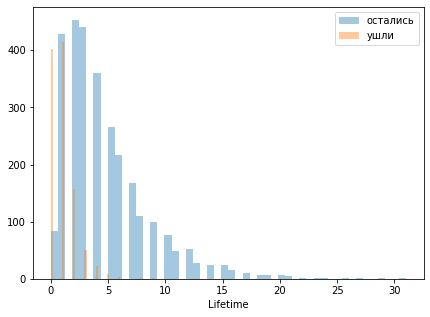

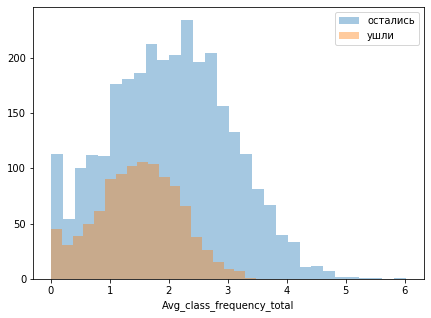

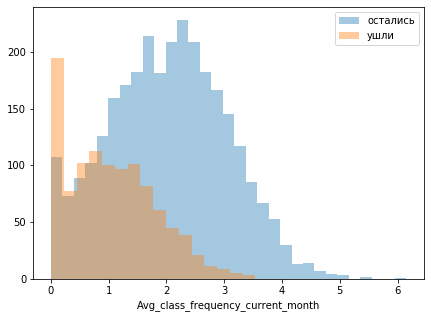

In [7]:
for i, el in enumerate(gym.columns.drop('Churn')):
    fig = plt.figure(figsize=(7, 5))
    for val in gym['Churn'].unique():    
        sns.distplot(gym[gym['Churn'] == val][el], kde=False)
        plt.legend(['остались','ушли'])
    plt.show()

Построим матрицу корреляций.

In [8]:
corr_gym = gym.corr()
corr_gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


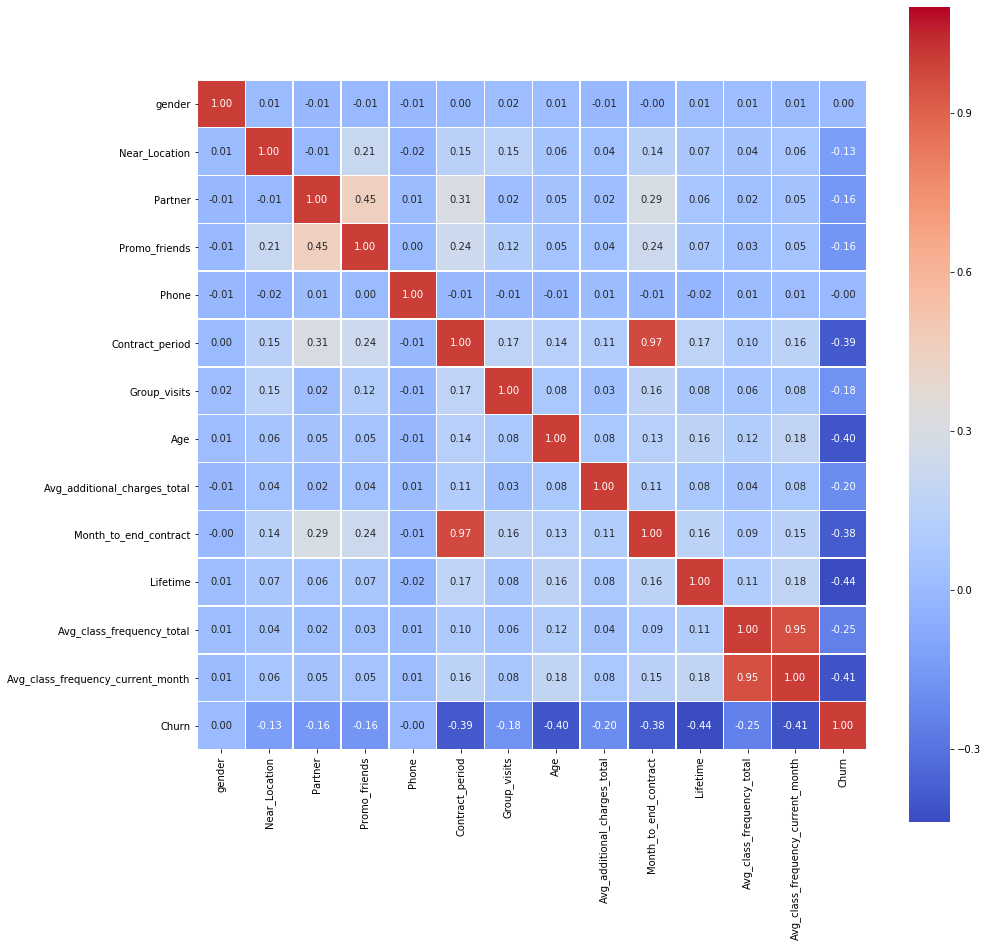

In [9]:
plt.figure(figsize=(15,15)) 
sns.heatmap(corr_gym, annot=True, fmt='.2f', cmap= 'coolwarm', linecolor='white', vmax=1.1, linewidths=0.5, square=True);

Видим высокую корреляцюя у параметров **Contract_period - Month_to_end_contract** (длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента) клиенты надавно купили абонементы<br><br>
И **Avg_class_frequency_total - Avg_class_frequency_current_month** (чсредняя частота посещений в неделю за все время и средняя частота посещений в неделю за предыдущий месяц).<br><br>
Делаем вывод, что если фитнес-центр находится далеко,клиент не участвует в партнерской программе, редко посещает групповые занятия, оформляет абонемент на месяц или редко посещает зал, то он с большей вероятностью уйдёт.

В данных есть две пары сильно скоррелированных признаков. Одну переменную из пары стоит удалять, иначе она будет доминировать при обучении. Удаляем сильно коррелирующие признаки **'Month_to_end_contract', 'Avg_class_frequency_current_month'**

In [10]:
gym_drop = gym.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis=1)

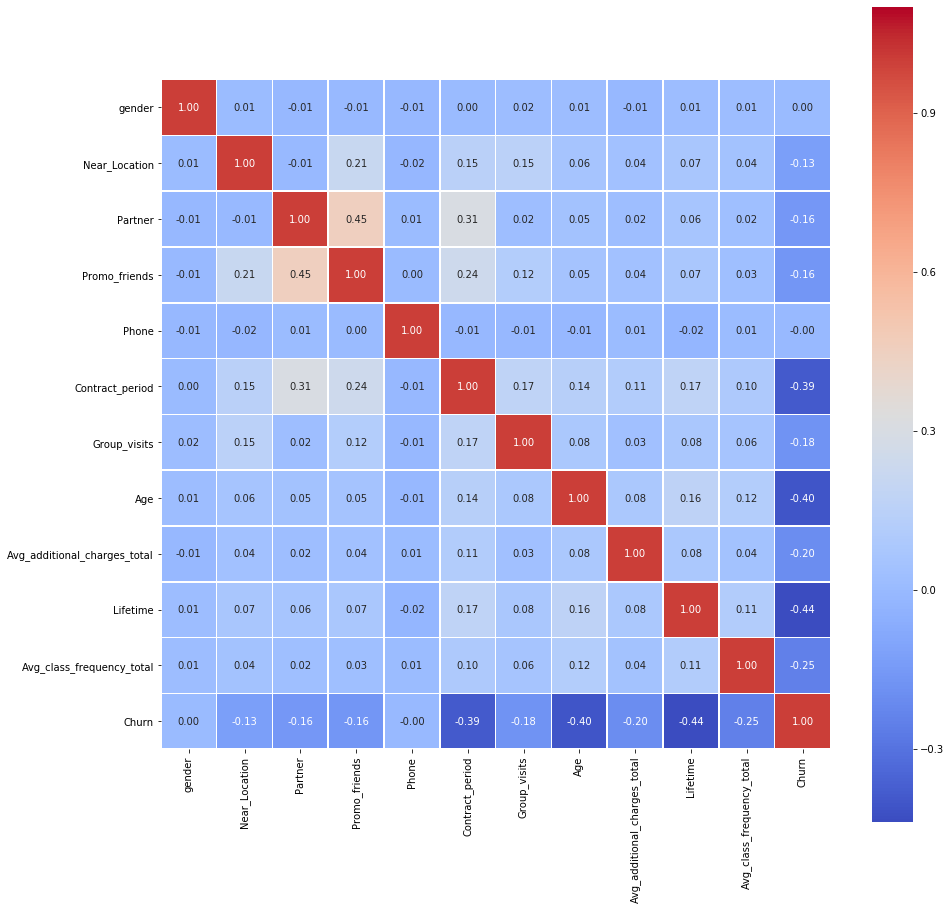

In [11]:
plt.figure(figsize=(15,15)) 
sns.heatmap(gym_drop.corr(), annot=True, fmt='.2f', cmap= 'coolwarm', linecolor='white', vmax=1.1, linewidths=0.5, square=True);

## Постройте модель прогнозирования оттока клиентов

Для решения задачи бинарной классификации, используем обучение с учителем<br>
Сравним несколько возможных моделей. Для обучения будем использовать <b>LogisticRegression</b> и <b>RandomForestClassifier</b>.

In [12]:
#разделим датасет на признаки (матрица X) и целевую переменную (вектор y)
X = gym_drop.drop('Churn', axis=1)
y = gym_drop['Churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = [LogisticRegression(random_state=0, solver='liblinear'), RandomForestClassifier(random_state=0, n_estimators = 100)]

In [13]:
def make_prediction(m, X_train, X_test, y_train, y_test):
        
    # обучение модели
    model = m
    model.fit(X_train, y_train)    
    # проверка модели на тестовой выборке
    y_pred = model.predict(X_test)
    
    # расчёт основных метрик
    print(model.__class__.__name__)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}\n'.format(recall_score(y_test, y_pred)))

In [14]:
for m in models:
    make_prediction(m, X_train, X_test, y_train, y_test)

LogisticRegression
Accuracy: 0.88
Precision: 0.76
Recall: 0.77



/Users/aignatkin/opt/anaconda3/envs/YandexPraktikum/lib/python3.7/site-packages/sklearn/utils/fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



RandomForestClassifier
Accuracy: 0.89
Precision: 0.78
Recall: 0.77



/Users/aignatkin/opt/anaconda3/envs/YandexPraktikum/lib/python3.7/site-packages/sklearn/utils/fixes.py:223: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



 Модель **RandomForestClassifier** показала результаты немного лучше

## Сделайте кластеризацию клиентов

Стандартизируем данные

In [15]:
# стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(gym_drop.drop('Churn', axis=1))

In [16]:
linked = linkage(X_sc, method = 'ward')

Визуализируем дендрограмму

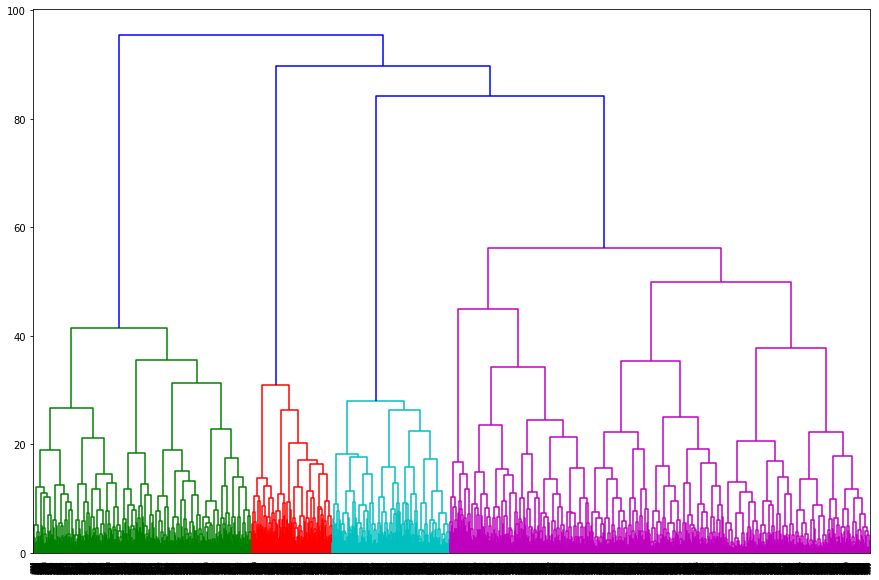

In [17]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании полученного графика можно выделить 4 кластера - число цветов на графике.

Согласно заданию, число кластеров принимаем **n=5**   

In [18]:
model = KMeans(n_clusters=5, random_state=0)
labels = model.fit_predict(X_sc)

In [19]:
gym['cluster_km'] = labels
gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,2.853832,3.060606,1.770413,1.606619,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,6.988571,4.380952,1.978963,1.933736,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,2.650177,3.343640,1.800647,1.645965,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,4.165327,3.761194,1.941342,1.845911,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


В 0 кластере находятся клиенты, которые живет далеко покупают короткие абонементы, редко посещают групповые занятия.

В 1 кластере клиенты чаще всего приходят по партнерской или промо-акции, покупают самые длительные абонементы, чаще всех ходят в зал и на групповые занятия, больше всех тратят на доп услуги. Фитнес-центр находится рядом с работой или домом.  

Во 2 кластере находятся клиенты у которых фитнес-центр находится рядом с работой или домом, покупают короткие абонементы(скорее всего на пробу). Достаточно редко посещают фитнес-центр и не посещают групповые занятия.

В 3 кластере находятся клиенты у которых фитнес-центр находится рядом с работой или домом, покупают  длительные абонементы, часто ходят в зал и на групповые занятия, много тратят на доп услуги. 

В 4 кластере находятся клиенты многие из которых приходят по партнерской или промо-акции. У многих Фитнес-центр находится рядом с работой или домом. Хорошо посещают групповые занятия. И почему-то не оставляют контактный телефон.


Построим гистограммы параметров по кластерам.

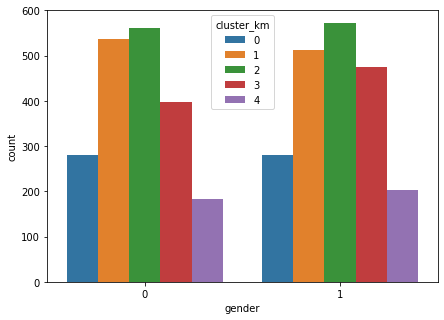

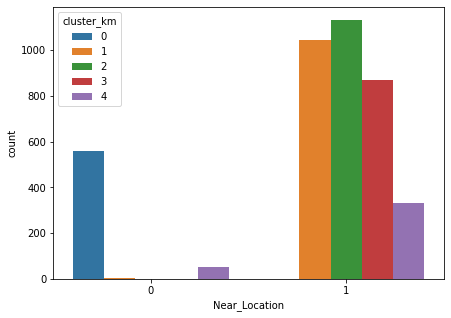

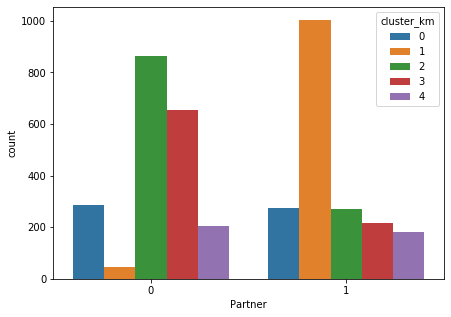

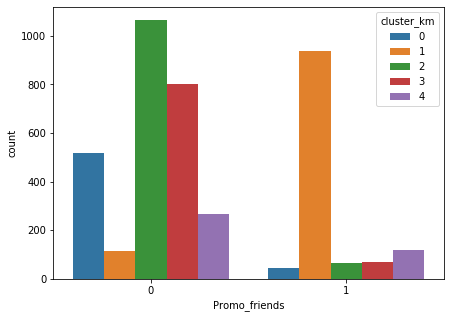

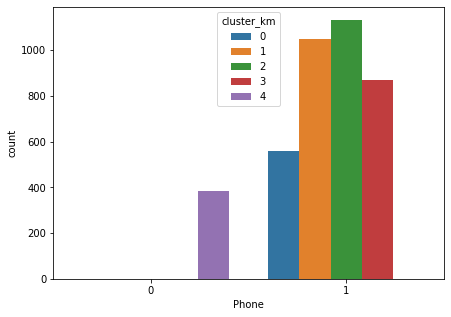

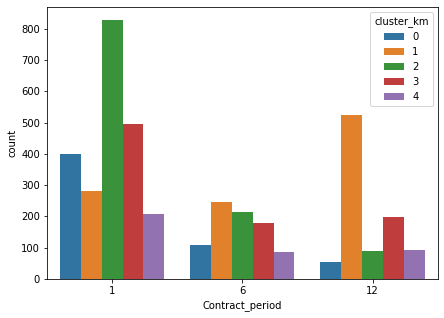

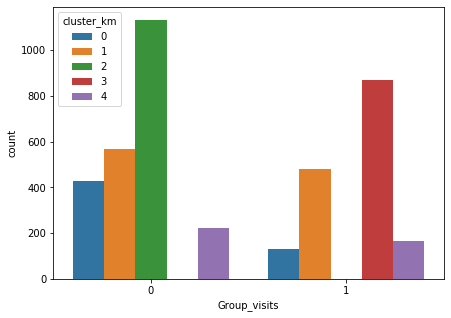

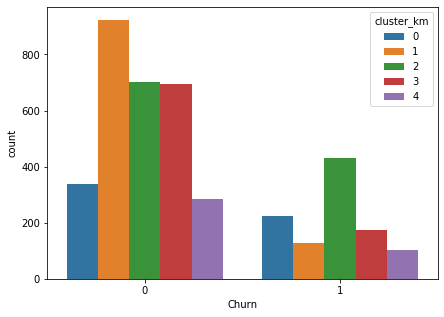

In [21]:
data1 = ['gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Churn']

for i, el in enumerate(data1):
    fig = plt.figure(figsize=(7, 5))
    sns.countplot(data = gym, x = el, hue = 'cluster_km');
    plt.xlabel(el)
    plt.show()

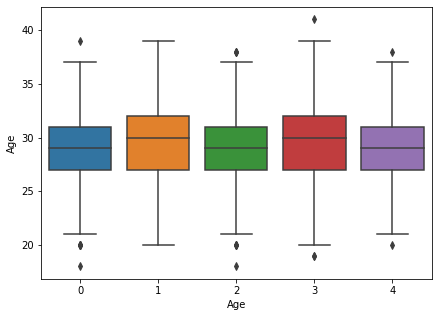

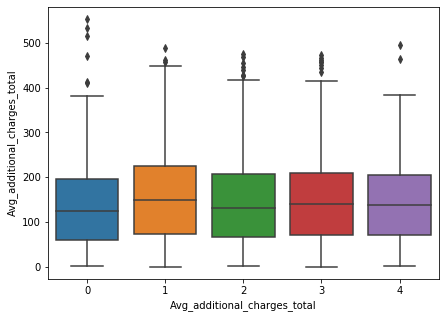

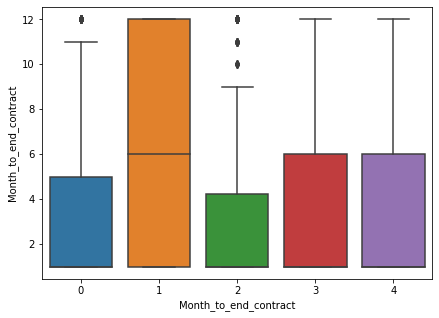

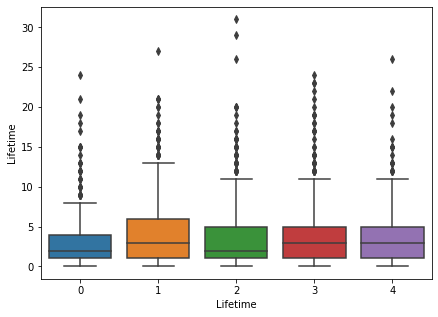

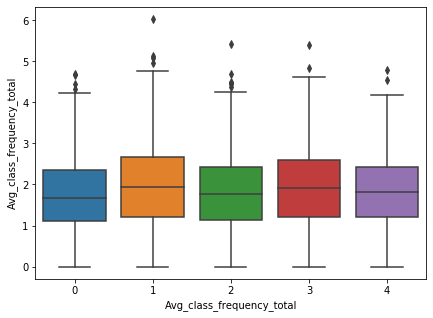

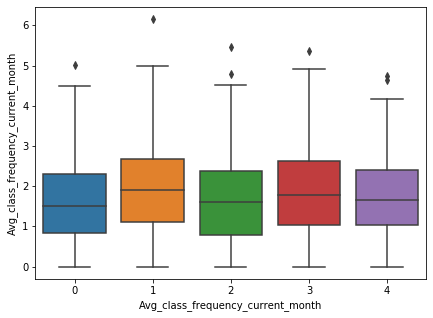

In [22]:
data2 = ['Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month']

for i, el in enumerate(data2):
    fig = plt.figure(figsize=(7, 5))
    sns.boxplot(x ='cluster_km',y = el, data = gym);
    plt.xlabel(el)
    plt.show()

Посчитаем долю оттока для каждого кластера.

In [23]:
gym.groupby('cluster_km')['Churn'].mean().reset_index()

,cluster_km,Churn
0,0,0.399287
1,1,0.120952
2,2,0.381625
3,3,0.200918
4,4,0.266839


Больше жалающих покинуть фитнес-центр в кластерах 0 и 2.<br>
В 1 кластерк меньше всего желающих уйти 

## Общий вывод

Модель прогнозирования оттока пользователей, обученная с помощью  **RandomForestClassifier** показала результаты лучше чем  алгоритм линейной регрессии. Доля правильных ответов (accuracy), точность (precision) и полнота (recall) у нее выше.

Было выполнено деление на 5 кластеров: склонных к уходу больше всего в 0 и 2 кластерах. Самые лояльные клиенты находятся в 1 кластере.

Часть клиентов (0 и 2 кластер) склонных к оттоку оформляют абонемент на короткий срок в среднем на 3 месяца, реже других ходят в зал и на групповын занятия.

**Рекомендации по работе с клиентами:**

1. Можно запустить предложение о покупке абонементов на 2 или 3 месяца по льготной цене для новых клиентов.

2. Можно запустить программу "Приведи друга" и давать бонусы за привод друга 3 месяца занятий бесплатно, если друг останется более 3 месяцев.

3. Сделать скидки на абонементы длительностью более 6 месяцев.